Belfiore Asia, CID:02129867

MSc Advanced Computing, Spring Term, January 2025

# **Analysis of Acute Kidney Injury (AKI) Data**

In [79]:
import pandas as pd # add to requirements.txt
import numpy as np  # add to requirements.txt
import matplotlib.pyplot as plt # add to requirements.txt
import seaborn as sns   # add to requirements.txt

# 1. Load the training data
train_data = pd.read_csv('training.csv', sep=',')
# map the aki column to binary
def to_binary(x):
    if x == 'y': return 1
    else: return 0
train_data['aki'] = train_data['aki'].apply(to_binary)
train_data

,age,sex,aki,creatinine_date_0,creatinine_result_0,creatinine_date_1,creatinine_result_1,creatinine_date_2,creatinine_result_2,creatinine_date_3,...,creatinine_date_4,creatinine_result_4,creatinine_date_5,creatinine_result_5,creatinine_date_6,creatinine_result_6,creatinine_date_7,creatinine_result_7,creatinine_date_8,creatinine_result_8
0,35,m,0,2023-11-10 19:14:00,105.61,2023-11-12 09:14:00,106.07,2023-11-12 11:50:00,98.76,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,m,0,2023-06-12 19:54:00,174.11,2023-06-13 14:27:00,210.22,2023-06-16 15:55:00,210.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,m,0,2023-04-17 19:41:00,108.12,2023-04-19 09:58:00,104.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,m,0,2023-02-19 18:05:00,206.12,2023-05-10 12:19:00,214.51,2023-05-10 14:29:00,224.88,2023-05-11 09:20:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,m,0,2023-04-08 14:40:00,111.43,2023-04-10 13:42:00,87.20,2023-06-17 11:32:00,80.58,2023-06-17 15:50:00,...,2023-06-19 16:03:00,112.88,2023-06-21 09:45:00,117.44,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,50,m,0,2023-03-01 13:15:00,78.99,2023-03-03 09:13:00,72.17,2023-03-05 14:45:00,92.08,2023-10-06 12:21:00,...,2023-10-06 12:29:00,73.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999996,64,m,0,2023-07-02 14:02:00,118.14,2023-07-04 16:04:00,112.45,2023-07-04 16:20:00,124.21,2023-07-06 13:52:00,...,2023-07-08 16:31:00,121.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,47,f,0,2023-04-22 17:39:00,87.90,2023-04-24 18:24:00,92.81,2024-01-03 16:33:00,81.39,2024-01-03 17:17:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,62,f,0,2023-07-07 11:43:00,106.79,2023-07-08 17:26:00,104.93,2023-11-14 09:29:00,98.66,2023-11-14 12:46:00,...,2023-11-14 17:20:00,118.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


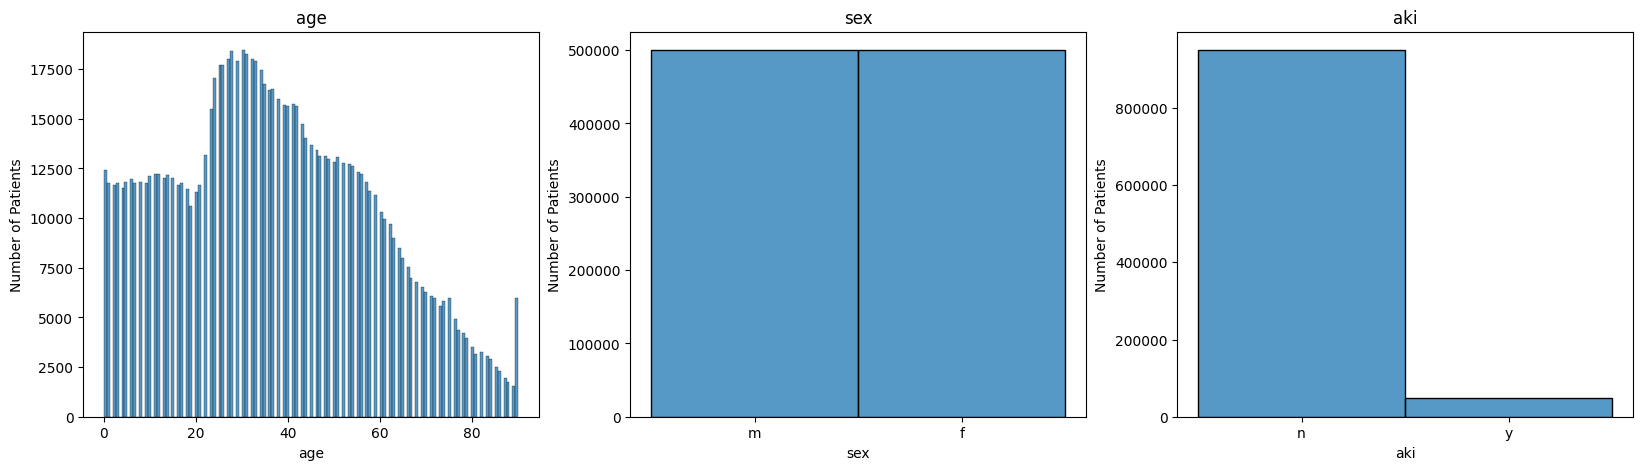

In [ ]:
# 1.1 Print some statistics about the data
fig, axes = plt.subplots(figsize=(20,5), ncols=3)

for i,col in enumerate(['age', 'sex', 'aki']):
    # plot the change in creatinine levels of the patient over time
    # train_data[col].plot(ax=axes[0,i])
    sns.histplot(data=train_data, x=col, ax=axes[i])
    axes[i].set_ylabel("Number of Patients")
    axes[i].set_title(f"{col}")

/var/folders/vr/t_3rc9l16fzfc__65h566qhw0000gn/T/ipykernel_10686/1576594558.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


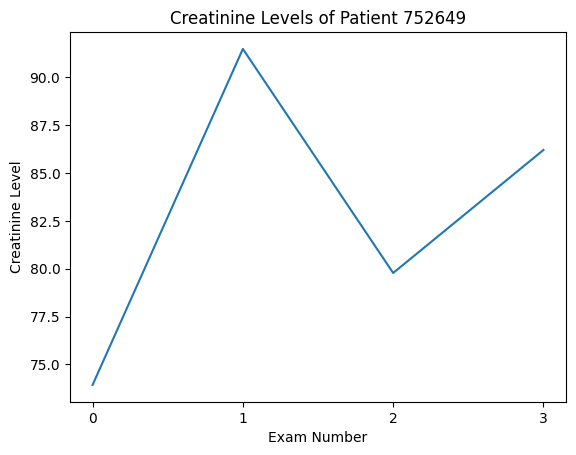

In [ ]:
# 1.2 Analysis of Creatinine Levels
creatinine_levels = train_data.copy()
creatinine_levels = creatinine_levels.drop(columns=['age', 'sex', 'aki', 'creatinine_date_0', 'creatinine_date_1', 'creatinine_date_2', 'creatinine_date_3',
                        'creatinine_date_4', 'creatinine_date_5', 'creatinine_date_6', 'creatinine_date_7', 'creatinine_date_8',])

# Plot Creatinine Levels of a Random Patient
def plot_patient_creatinine(patient):
    fig, ax = plt.subplots()

    # adjust the x-axis labels based on how many tests this patient has taken
    labels = [index for index in range(len(ax.get_xticklabels()))]
    ax.set_xticklabels(labels)

    # plot the change in creatinine levels of the patient over time
    plt.plot(creatinine_levels.iloc[patient])
    plt.xlabel('Exam Number')
    plt.ylabel('Creatinine Level')
    plt.title(f'Creatinine Levels of Patient {patient+1}')

plot_patient_creatinine(np.random.randint(0, creatinine_levels.shape[0]))

In [100]:
# 1.4 Analysis of Creatinine Levels
exam_times = train_data.copy()
exam_times = exam_times.drop(columns=['age', 'sex', 'aki', 'creatinine_result_0', 'creatinine_result_1', 'creatinine_result_2', 'creatinine_result_3',
                        'creatinine_result_4', 'creatinine_result_5', 'creatinine_result_6', 'creatinine_result_7', 'creatinine_result_8',])

# rename exam dates columns 
for i in range(exam_times.shape[1]):
    exam_times.rename(columns={f'creatinine_date_{i}': f'exam_{i}'}, inplace=True)
    exam_times[f'exam_{i}'] = pd.to_datetime(exam_times[f'exam_{i}'])

# calculate time elapsed between subsequent exams
exams_time_difference = {}
prev = 0
for next in range(1,exam_times.shape[1]):
    exams_time_difference[f'exam_{prev}-exam_{next}'] = (exam_times.loc[:][f'exam_{next}']-exam_times.loc[:][f'exam_{prev}'])
    prev = next

exams_time_difference = pd.DataFrame(exams_time_difference).fillna(0).astype('timedelta64[ns]')
exams_time_difference

,exam_0-exam_1,exam_1-exam_2,exam_2-exam_3,exam_3-exam_4,exam_4-exam_5,exam_5-exam_6,exam_6-exam_7,exam_7-exam_8
0,1 days 14:00:00,0 days 02:36:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days,0 days
1,0 days 18:33:00,3 days 01:28:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days,0 days
2,1 days 14:17:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days,0 days
3,79 days 18:14:00,0 days 02:10:00,0 days 18:51:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days,0 days
4,1 days 23:02:00,67 days 21:50:00,0 days 04:18:00,2 days 00:13:00,1 days 17:42:00,0 days,0 days,0 days
...,...,...,...,...,...,...,...,...
999995,1 days 19:58:00,2 days 05:32:00,214 days 21:36:00,0 days 00:08:00,0 days 00:00:00,0 days,0 days,0 days
999996,2 days 02:02:00,0 days 00:16:00,1 days 21:32:00,2 days 02:39:00,0 days 00:00:00,0 days,0 days,0 days
999997,2 days 00:45:00,253 days 22:09:00,0 days 00:44:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days,0 days
999998,1 days 05:43:00,128 days 16:03:00,0 days 03:17:00,0 days 04:34:00,0 days 00:00:00,0 days,0 days,0 days


MemoryError: Unable to allocate 224. PiB for an array with shape (31549200000000000,) and data type float64

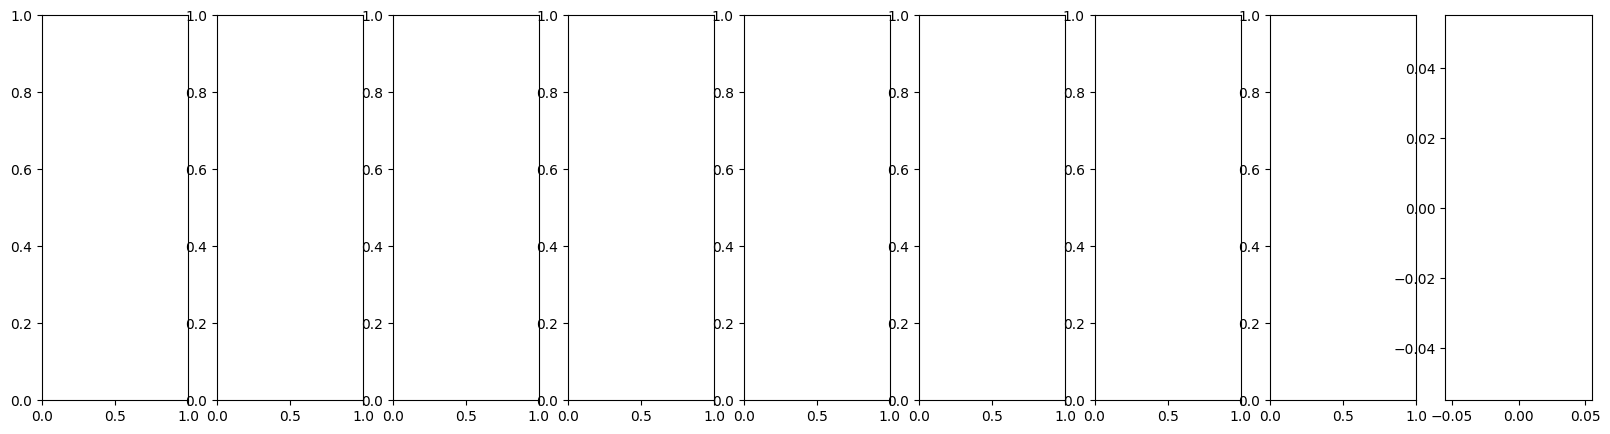

In [101]:
fig, axes = plt.subplots(figsize=(20,5), ncols=9)
for col in exams_time_difference.columns:
    sns.histplot(data=exams_time_difference, x=col, ax=axes[i])
    axes[i].set_ylabel("Time Elapsed")
    axes[i].set_title(f"{col}")